In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

In [16]:
# Reading data
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [17]:
# Excluding non informative columns
data.drop(columns = ['id','date'], inplace = True)
column_names = data.columns
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [23]:
# Selecting x and y
data = data.loc[:,['price','sqft_living']]
data.head()

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680


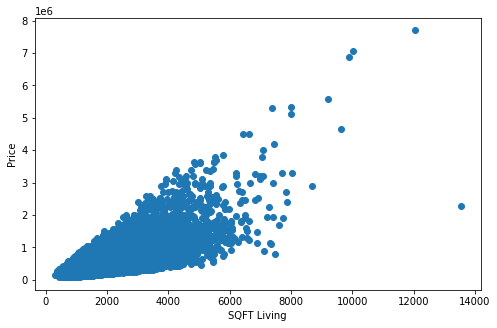

In [24]:
plt.figure(figsize = (8,5))
plt.scatter(x = data['sqft_living'], y = data['price'])
plt.xlabel("SQFT Living")
plt.ylabel("Price")

plt.show()

In [26]:
# Creating the models
model1 = LinearRegression()
model2 = DecisionTreeRegressor()

In [37]:
# Splitting the X and Y variables
X = np.array(data['sqft_living']).reshape(-1,1)
y = np.array(data['price'])

In [38]:
# Splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# Fitting the models
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

DecisionTreeRegressor()

In [40]:
# Predicting the test values
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)

In [42]:
# Metrics
r2_1 = r2_score(y_test, pred1)
r2_2 = r2_score(y_test, pred2)

rmse_1 = (np.sqrt(mean_squared_error(y_test, pred1)))
rmse_2 = (np.sqrt(mean_squared_error(y_test, pred2)))

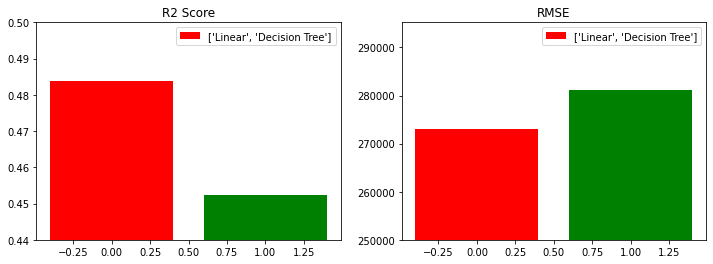

In [49]:
plt.figure(figsize=(12, 4))

l = ["Linear","Decision Tree"]

plt.subplot(1,2,1)
plt.title("R2 Score")
plt.bar(x = np.arange(0,2), height = [r2_1, r2_2], label = l, color = ["red",'green'])
plt.ylim(0.44, 0.5)
plt.legend()

plt.subplot(1,2,2)
plt.title("RMSE")
plt.bar(x = np.arange(0,2), height = [rmse_1, rmse_2], label = l, color = ["red",'green'])
plt.ylim(250000)
plt.legend()

plt.show()